# Przekraczanie prędkości

In [2]:
#  Pobranie nowych danych
#  from autobusy.downloading import download_buses as dwnld_bus
# 
#  res = dwnld_bus.download_positions(4000)

In [3]:
# import pickle

# with open('21-02-2024.pkl', 'wb') as file:
#         pickle.dump(res, file)


In [4]:
import pickle 

with open('21-02-2024.pkl', 'rb') as f:
    unpickled = pickle.load(f)


In the first time interval:
speeded 1265 out of 1775
speed was greate (or equal) to 100 in 282 cases
In the second time interval:
speeded 1012 out of 1780
speed was greate (or equal) to 100 in 330 cases


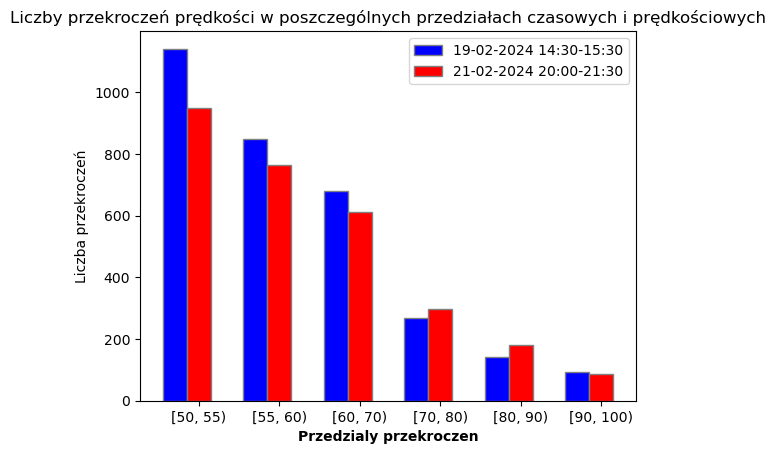

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
import numpy as np
from autobusy import analyze_speed as an_speed

with open('19-02-2024.pkl', 'rb') as f1:
    first = pickle.load(f1)
    
with open('21-02-2024.pkl', 'rb') as f2:
    second = pickle.load(f2)
    
print("In the first time interval:")
first_intervals, first_places = an_speed.count_speeding(first)
print("In the second time interval:")
second_intervals, second_places = an_speed.count_speeding(second)


full_intervals1 =  {
    '[50, 55)' : first_intervals[4], '[55, 60)' : first_intervals[5],
    '[60, 70)' : first_intervals[6], '[70, 80)' : first_intervals[7],
    '[80, 90)' : first_intervals[8], '[90, 100)' : first_intervals[9]
}

full_intervals2 =  {
    '[50, 55)' : second_intervals[4], '[55, 60)' : second_intervals[5],
    '[60, 70)' : second_intervals[6], '[70, 80)' : second_intervals[7],
    '[80, 90)' : second_intervals[8], '[90, 100)' : second_intervals[9]
}

szerokoscSlupka = 0.3

# Ustaw pozycję słupka na osi X
r1 = np.arange(len(list(full_intervals1.keys())))
r2 = [x + szerokoscSlupka for x in r1]

# Stwórz słupki
plt.bar(r1, full_intervals1.values(), color='blue', width=szerokoscSlupka, edgecolor='grey', label='19-02-2024 14:30-15:30')
plt.bar(r2, full_intervals2.values(), color='red', width=szerokoscSlupka, edgecolor='grey', label='21-02-2024 20:00-21:30')

# Dodaj etykiety, tytuł i legendę
plt.xlabel('Przedzialy przekroczen', fontweight='bold')
plt.xticks([r + szerokoscSlupka for r in range(len(list(full_intervals1.keys())))], full_intervals1.keys())
plt.ylabel('Liczba przekroczeń')
plt.title('Liczby przekroczeń prędkości w poszczególnych przedziałach czasowych i prędkościowych')
plt.legend()

plt.show()

Zaokrąglam lokalizacje przekroczeń prędkości do 3 miejsc po przecinku (promień rzędu 100m)

In [6]:
from autobusy import analyze_speed as an_speed

count_min = 6
speed_min = 55
how_many_where1 = an_speed.most_common_speeding_places(first_places)
how_many_where2 = an_speed.most_common_speeding_places(second_places)
output1 = an_speed.speeding_places_dict(how_many_where1, count_min, speed_min)
output2 = an_speed.speeding_places_dict(how_many_where2, count_min, speed_min)
common = {}
for location in output1.keys():
    common[location] = (output1[location][0], output1[location][1], 0, 0.0, output1[location][0], output1[location][1])
for location in output2.keys():
    if location in common.keys():
        prev1 = common[location][0]
        prev2 = common[location][1]
        common[location] = (prev1, prev2, output2[location][0], output2[location][1], prev1 + output2[location][0], (prev1*prev2 + output2[location][0] * output2[location][1])/(prev1 + output2[location][0]))
    else:
        common[location] = (0, 0.0, output2[location][0], output2[location][1], output2[location][0], output2[location][1])
pd.DataFrame.from_dict(common, orient='index', columns=['liczba1', 'srednia1', 'liczba2', 'srednia2', 'liczba_lacznie', 'srednia_lacznie'])

,liczba1,srednia1,liczba2,srednia2,liczba_lacznie,srednia_lacznie
"52.14N, 21.098E",9,67.186811,0,0.000000,9,67.186811
"52.156N, 21.017E",7,58.522488,0,0.000000,7,58.522488
"52.158N, 21.018E",7,56.393694,0,0.000000,7,56.393694
"52.158N, 21.017E",11,60.562383,0,0.000000,11,60.562383
"52.159N, 21.018E",8,56.002344,8,63.704853,16,59.853599
...,...,...,...,...,...,...
"52.303N, 20.99E",0,0.000000,11,55.823150,11,55.823150
"52.305N, 20.987E",0,0.000000,8,55.697054,8,55.697054
"52.308N, 20.983E",0,0.000000,9,63.789014,9,63.789014
"52.312N, 21.003E",0,0.000000,7,57.259600,7,57.259600


# Punktualność

In [7]:
#  Opcjonalnie, jesli dane nie byly jeszcze pobrane
#  UWAGA! WYKONUJE SIE B A R D Z O DLUGO (~10h)
# from autobusy.downloading import download_timetables as dwnld_tmtbl 
# 
# lines_where_when = dwnld_tmtbl.download_all()

In [8]:
import pickle

#  Jeśli rozkłady były już pobrane
with open("lines-where-when-full.pkl", 'rb') as plik:
    lines_where_when = pickle.load(plik)

In [9]:
import pickle
from autobusy.analyze_punctuality import lates

with open('19-02-2024.pkl', 'rb') as p1:
    data1 = pickle.load(p1)
    
with open('21-02-2024.pkl', 'rb') as p2:
    data2 = pickle.load(p2)
    
print("Liczba i procent spoznien w przedziale 2024-02-19 14:00-16:00")
przedzialy_spoznien1 = lates(data1, lines_where_when, '2024-02-19 14:00:00', '2024-02-19 16:00:00')
print("Liczba i procent spoznien w przedziale 2024-02-21 20:00-22:00")
przedzialy_spoznien2 = lates(data2, lines_where_when, '2024-02-21 20:00:00', '2024-02-21 22:00:00')

Liczba i procent spoznien w przedziale 2024-02-19 14:00-16:00
spoznien: 494 (57.04%)
Liczba i procent spoznien w przedziale 2024-02-21 20:00-22:00
spoznien: 213 (53.12%)


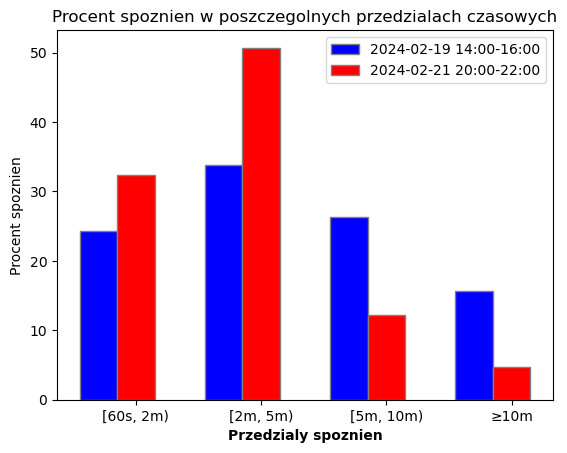

In [10]:
kategorie = przedzialy_spoznien1.keys()
grupa1 = przedzialy_spoznien1.values()
grupa2 = przedzialy_spoznien2.values()

# Zdefiniuj szerokość słupka
szerokoscSlupka = 0.3

# Ustaw pozycję słupka na osi X
r1 = np.arange(len(grupa1))
r2 = [x + szerokoscSlupka for x in r1]

# Stwórz słupki
plt.bar(r1, grupa1, color='blue', width=szerokoscSlupka, edgecolor='grey', label='2024-02-19 14:00-16:00')
plt.bar(r2, grupa2, color='red', width=szerokoscSlupka, edgecolor='grey', label='2024-02-21 20:00-22:00')

# Dodaj etykiety, tytuł i legendę
plt.xlabel('Przedzialy spoznien', fontweight='bold')
plt.xticks([r + szerokoscSlupka for r in range(len(grupa1))], kategorie)
plt.ylabel('Procent spoznien')
plt.title('Procent spoznien w poszczegolnych przedzialach czasowych')
plt.legend()

plt.show()